         Current function value: 2054.992743
         Iterations: 77
         Function evaluations: 218
         Gradient evaluations: 207


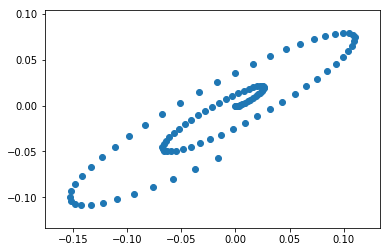

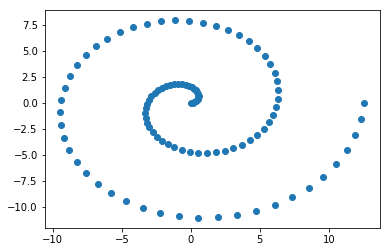

In [38]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

def f(W):
    W = np.reshape(W, (10,2))
    WWT = np.dot(W,np.transpose(W))
    I = np.eye(10)
    A = np.trace(np.dot(np.dot(Y, np.linalg.inv(WWT + I)),np.transpose(Y)))
    B = np.log(np.linalg.det(WWT + I))
    C = 10*np.log(2*np.pi)
    return 0.5*100*(A + B + C)

def dfx(W):
    W = np.reshape(W, (10,2))
    WWT = np.dot(W,np.transpose(W))
    I = np.eye(10)
    prec = np.linalg.inv(WWT + I)
    
    gd = np.empty(W.shape)
    for i in range(gd.shape[0]):
        for j in range(gd.shape[1]):
            J = np.zeros(np.shape(W))
            J[i,j] = 1
            JWWJ = np.dot(J,np.transpose(W)) + np.dot(W,np.transpose(J))
            dprec = np.dot(np.dot(-prec, JWWJ), prec)
            A = np.trace(np.dot(np.dot(Y,dprec), np.transpose(Y)))
            B = np.trace(np.dot(prec, JWWJ))
            gd[i,j] = 100*0.5*(A + B)
    gd = np.reshape(gd,(20,))
    return gd

def fnonlin(x):
    Y = np.zeros((100,2))
    Y[:,0]= np.multiply(x,np.cos(x))
    Y[:,1]= np.multiply(x,np.sin(x))
    return Y

def flin(x, A):
    return np.dot(x, np.transpose(A))

A = np.random.randn(20)
A = A.reshape((10,2))

x = np.linspace(0,4*np.pi,100)
xprime = fnonlin(x)

Y = flin(xprime, A)

A = np.random.randn(20)
A = np.reshape(A, (20,))

prior = np.zeros(20)
Wprime = opt.fmin_cg(f,A, fprime=dfx)
Wprime = np.reshape(Wstar,(10,2))
WTW = np.dot(np.transpose(W),W)
learned = np.dot(Y, np.dot(W, np.linalg.inv(WTW))) 

plt.figure(1)
plt.scatter(learned[:,0],learned[:,1])
plt.figure(2)
plt.scatter(xprime[:,0],xprime[:,1])
plt.show()